In [45]:
from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
from math import *
import pandas as pd
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick
import seaborn as sns
from scipy import interpolate
from random import *
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord, ICRS, Galactic
import astropy.units as units
import galpy.util.bovy_coords as gub
import os
sys.path.append("../TOOLBOX/")
from growing_region import *
from tool import *
from tool_norm import *

U_sun, V_sun, W_sun = 11.1, 12.24, 7.25
X_sun = 8.3
V_LSR = 232

sns.set_style("whitegrid")
matplotlib.rcParams.update({'font.size': 15})


# LOAD Data

In [46]:
data_path = "../DATA/"
res_path = "../RES/"

In [54]:
t=Table.read(data_path+"comaber_coma_85target_pm1_dn.fits")
mock = Table.read(data_path+"comaber_mock.fits")


# Calculate Inputs

In [63]:
llbb = gub.radec_to_lb(t['ra'],t['dec'],degree=True)
xyz = gub.lbd_to_XYZ(llbb[:,0],llbb[:,1],1e3/t['parallax'],degree=True)  
pos = gub.XYZ_to_galcenrect(xyz[:,0],xyz[:,1],xyz[:,2],Xsun=X_sun,Zsun=0.0)


In [64]:
t["l"] = llbb[:,0]
t["b"] = llbb[:,1]
t["x"] = pos[:,0]
t["y"] = pos[:,1]
t["z"] = pos[:,2]
t.write(res_path+"comaber_coma_85target_pm1_dn_xyz.fits", overwrite=True)

In [65]:
llbb_m = gub.radec_to_lb(mock['ra'],mock['dec'],degree=True)
xyz_m = gub.lbd_to_XYZ(llbb_m[:,0],llbb_m[:,1],1e3/mock['parallax'],degree=True)  
pos_m = gub.XYZ_to_galcenrect(xyz_m[:,0],xyz_m[:,1],xyz_m[:,2],Xsun=X_sun,Zsun=0.0)


In [66]:
mock["l"] = llbb_m[:,0]
mock["b"] = llbb_m[:,1]
mock["x"] = pos_m[:,0]
mock["y"] = pos_m[:,1]
mock["z"] = pos_m[:,2]
mock.write(res_path+"comaber_mock_xyz.fits", overwrite=True)

# Plot Inputs

Text(0, 0.5, '$z\\/(pc)$')

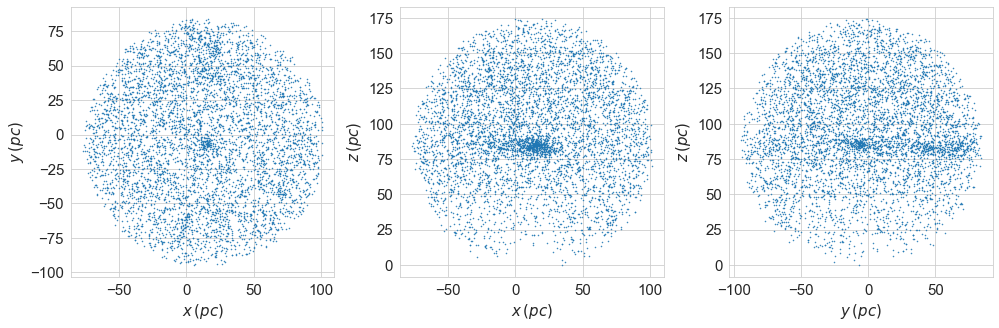

In [49]:
fig = figure(figsize = (16,5))
gs = gridspec.GridSpec(1, 3)
gs.update(left=0.1, right= 0.9, bottom = 0.15, top = 0.9, wspace=0.25, hspace = 0.)
ax1 = subplot(gs[0, 0])
ax2 = subplot(gs[0, 1])
ax3 = subplot(gs[0, 2])
ax1.plot(pos[:, 0], pos[:,1], ".", ms=1)
ax2.plot(pos[:, 0], pos[:,2], ".", ms=1)
ax3.plot(pos[:, 1], pos[:,2], ".", ms=1)

ax1.set_xlabel(r"$x\/(pc)$")
ax1.set_ylabel(r"$y\/(pc)$")
ax2.set_xlabel(r"$x\/(pc)$")
ax2.set_ylabel(r"$z\/(pc)$")
ax3.set_xlabel(r"$y\/(pc)$")
ax3.set_ylabel(r"$z\/(pc)$")

Text(0, 0.5, '$z\\/(pc)$')

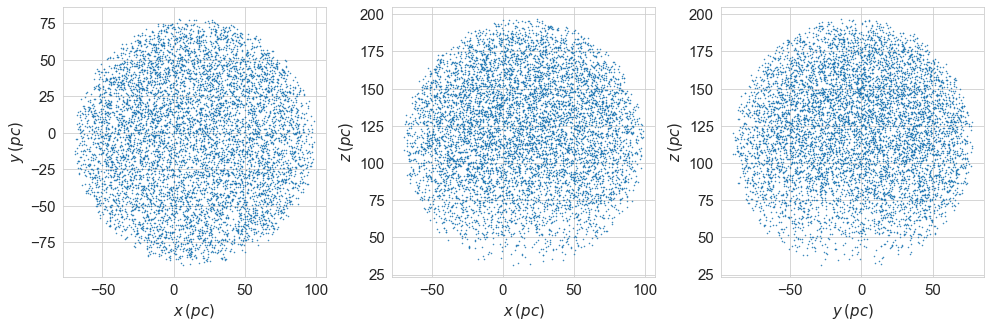

In [67]:
fig = figure(figsize = (16,5))
gs = gridspec.GridSpec(1, 3)
gs.update(left=0.1, right= 0.9, bottom = 0.15, top = 0.9, wspace=0.25, hspace = 0.)
ax1 = subplot(gs[0, 0])
ax2 = subplot(gs[0, 1])
ax3 = subplot(gs[0, 2])
ax1.plot(pos_m[:, 0], pos_m[:,1], ".", ms=1)
ax2.plot(pos_m[:, 0], pos_m[:,2], ".", ms=1)
ax3.plot(pos_m[:, 1], pos_m[:,2], ".", ms=1)

ax1.set_xlabel(r"$x\/(pc)$")
ax1.set_ylabel(r"$y\/(pc)$")
ax2.set_xlabel(r"$x\/(pc)$")
ax2.set_ylabel(r"$z\/(pc)$")
ax3.set_xlabel(r"$y\/(pc)$")
ax3.set_ylabel(r"$z\/(pc)$")

Text(0, 0.5, '$pmdec\\/(mas\\/yr^{-1})$')

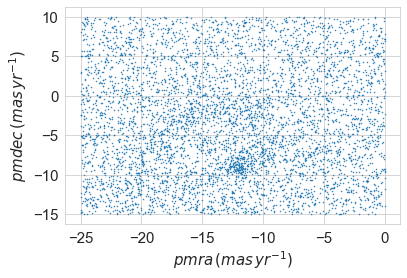

In [50]:
figure()
plot(t["pmra"], t["pmdec"], ".", ms=1)
xlabel(r"$pmra\/(mas\/yr^{-1})$")
ylabel(r"$pmdec\/(mas\/yr^{-1})$")

Text(0, 0.5, '$pmdec\\/(mas\\/yr^{-1})$')

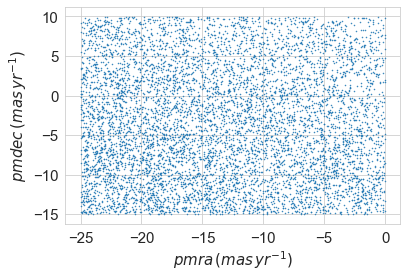

In [68]:
figure()
plot(mock["pmra"], mock["pmdec"], ".", ms=1)
xlabel(r"$pmra\/(mas\/yr^{-1})$")
ylabel(r"$pmdec\/(mas\/yr^{-1})$")

# Save Inputs

In [51]:
inputs = np.vstack((pos[:,0], pos[:,1], pos[:,2], t['pmra'], t['pmdec'])).T
print (inputs.shape)
np.save(res_path+"inputs_xyzpmradec_ComaBer_85target_pm1_dn.npy", inputs)

(5494, 5)


In [69]:
inputs_m = np.vstack((pos_m[:,0], pos_m[:,1], pos_m[:,2], mock['pmra'], mock['pmdec'])).T
print (inputs_m.shape)
np.save(res_path+"inputs_xyzpmradec_ComaBer_mock.npy", inputs_m)

(7212, 5)
